In [2]:
%matplotlib inline  
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt 
from collections import Counter
import math
from collections import Counter
import numpy as np
from scipy.special import comb
import itertools as it
# MANUEL: This doesn't work for me
#%load_ext line_profiler
from imp import reload
import itertools as it
import pandas as pd
import seaborn as sns
import sys
#sys.path.insert(0, '../mallows kendall')
import mallows_kendall as mk
import cego_lop
import cego
import lop
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


# running experiments
How to run one experiment with a particular parameter configuration

In [17]:
def binary_search_rho(w,rho_ini=1,rho_end=0, tol=0.001,pos=None):#0<w_i<1, w is sorted increasingly, 
  #if pos is None we take the largest 4th.
  #find the rho s.t. the largest weights (rho*ws) take the 0.9 of the total ws.  rho^w[:pos] = 0.9*rho^w
  if pos is None: pos = int(len(w)/4)
  rho_med = rho_ini + (rho_end-rho_ini)/2
  acum = np.cumsum(rho_med**w)
  a = acum[pos]
  b = acum[-1]
  if abs( a/b - 0.9) < tol: return rho_med
  if a/b > 0.9: return binary_search_rho(w,rho_ini,rho_med)
  return binary_search_rho(w,rho_med,rho_end)

kk = np.array([0.68285024, 0.29541063, 0.65362319 ,0.        , 0.35990338, 0.16980676,
 0.31859903 ,0.29154589 ,0.26618357 ,1.        ])
kk.sort()
kk = kk#[::-1]
print(kk)
binary_search_rho(kk)

[0.         0.16980676 0.26618357 0.29154589 0.29541063 0.31859903
 0.35990338 0.65362319 0.68285024 1.        ]


1.9073486328125e-05

In [28]:
reload(cego_lop)
reload(cego)
reload(lop)
reload(mk)
n = 20
m_max = 20
rep = 0
phi_instance = 0.7
budgetGA = 10
budgetMM = 10
cego_lop.run_and_save(n,rep,phi_instance, budgetGA,budgetMM,m_max=m_max)

1.9073486328125e-05
5.245208740234375e-06
7.62939453125e-06
3.0994415283203125e-06
0.000152587890625
0.0003814697265625
0.00091552734375
0.0006103515625
0.00048828125
0.000335693359375
0.000518798828125
7.62939453125e-06
2.2351741790771484e-08
4.656612873077393e-10
1.1175870895385742e-08
5.820766091346741e-10
3.637978807091713e-11
5.329070518200751e-15
2.1316282072803006e-14
2.168404344971009e-19


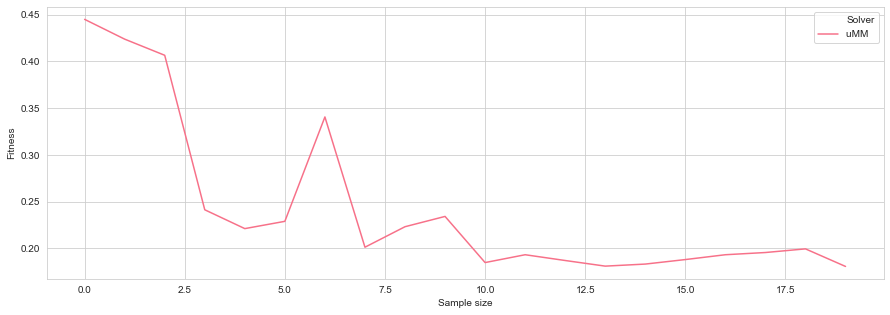

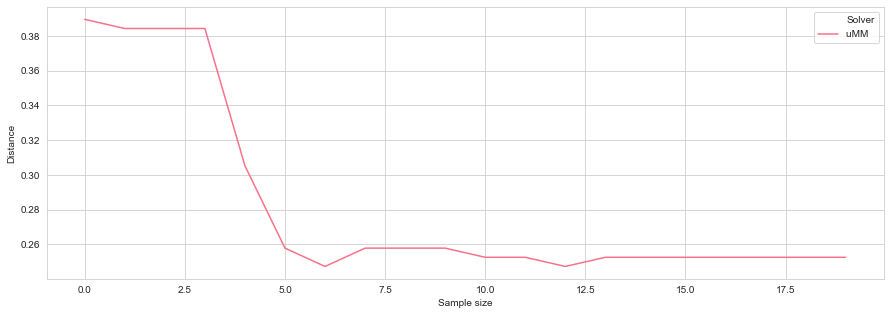

In [29]:
sns.set_style("whitegrid")
df = pd.read_pickle('pickles/pickLocal.pkl')#pick275670.pkl
color_variable = 'Solver'
y_variables = ['Fitness','Distance']
palette = sns.color_palette("husl", len(df[color_variable].drop_duplicates()))
for y_variable in y_variables:
    plt.figure(figsize=(15,5))
    sns.lineplot(x='Sample size',y=y_variable,hue='Solver',data=df, palette=palette)
    plt.show()

# Plot the results 

In [3]:
df = pd.concat([pd.read_pickle("pickles/"+f) for f in listdir("pickles") if (f.endswith(".pkl")and "Local" not in f)] )
df.head()


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Distance,Fitness,Problem,Sample size,Solver,best_known,budget,m_max,n,phi_estim,phi_instance,phi_sample,rep,rho,run_time,worst_known
0,0.389474,0.357178,LOP,0.0,CEGO,6964.0,1000,200,20,NaN,0.7,NaN,1.0,NaN,34441.745866,31036.0
1,0.615789,0.646976,LOP,1.0,CEGO,6964.0,1000,200,20,NaN,0.7,NaN,1.0,NaN,34441.745866,31036.0
2,0.578947,0.613659,LOP,2.0,CEGO,6964.0,1000,200,20,NaN,0.7,NaN,1.0,NaN,34441.745866,31036.0
3,0.573684,0.596045,LOP,3.0,CEGO,6964.0,1000,200,20,NaN,0.7,NaN,1.0,NaN,34441.745866,31036.0
4,0.489474,0.486873,LOP,4.0,CEGO,6964.0,1000,200,20,NaN,0.7,NaN,1.0,NaN,34441.745866,31036.0


### Cuántas repeticiones hay de cada experimento?

In [35]:
a = df[(df.n==20) & (df.budget==1000)&(df['Sample size']==0)].groupby(['Solver',
       'budget', 'm_max', 'n', 'phi_instance', 
       ]).count()['Distance']#.reset_index().values[:,-1]
a

Solver            budget  m_max  n   phi_instance
CEGO              1000    200    20  0.5             10
                                     0.7             10
                                     0.9             10
                          400    20  0.5             10
                                     0.7             10
                                     0.9             10
uMM, rho = 0.001  1000    200    20  0.5             10
                                     0.7             10
                                     0.9             10
                          400    20  0.5             10
                                     0.7             10
                                     0.9             10
uMM, rho = 0.1    1000    200    20  0.5             10
                                     0.7             10
                                     0.9             10
                          400    20  0.5             10
                                     0.7             1

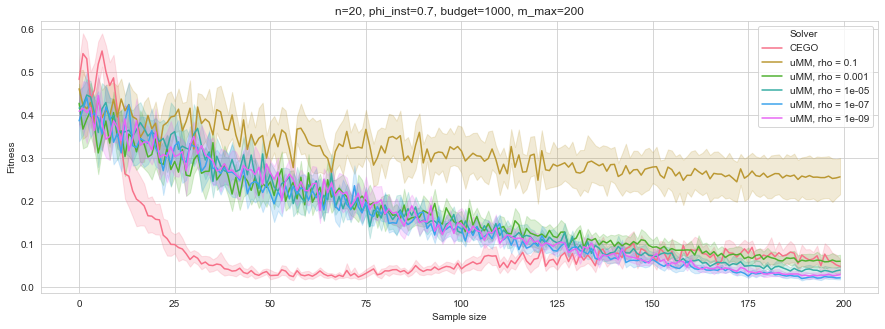

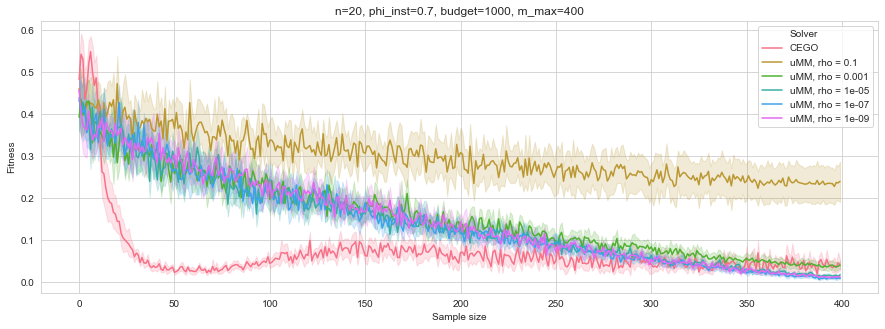

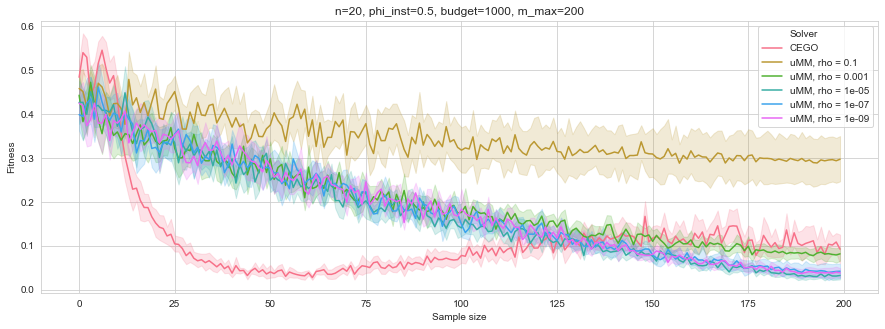

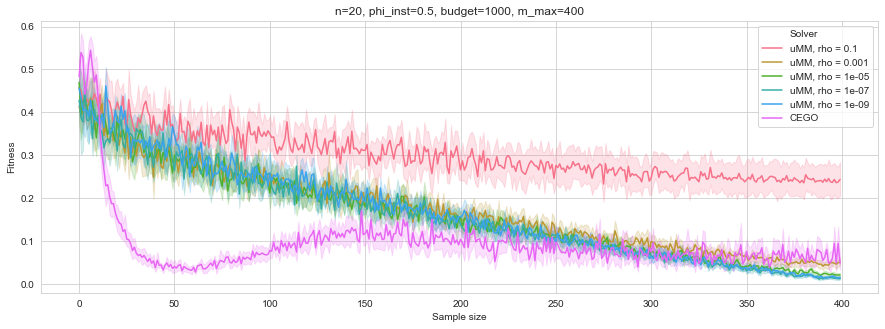

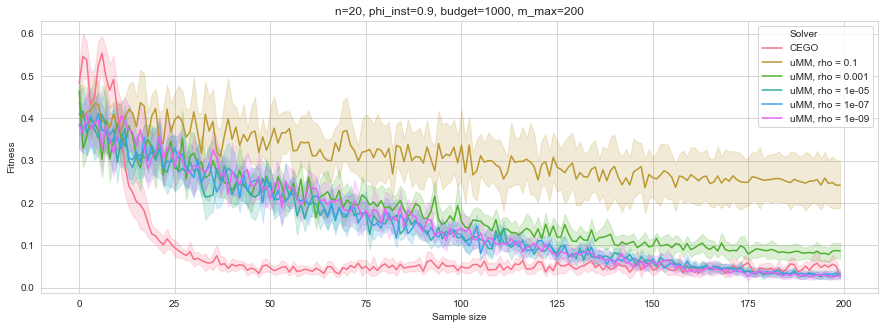

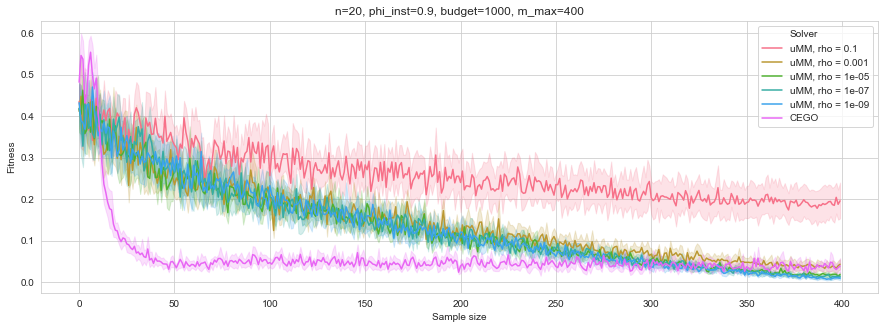

In [11]:
sns.set_style("whitegrid")
color_variable = 'Solver'
y_variables = ['Fitness']#,'Distance'

for phi_i in df.phi_instance.drop_duplicates().values:
  for n in [20]:#df.n.drop_duplicates().values:
    for budget in [1000]:# df.budgetGA.drop_duplicates().values:
      for y_variable in y_variables:
        for m_max in [200,400]:
          plt.figure(figsize=(15,5))
          aux = df[(df.phi_instance==phi_i) & (df.n==n) & (df.budget==budget) & (df.m_max==m_max)] #& (df.rep==0)
          palette = sns.color_palette("husl", len(aux[color_variable].drop_duplicates()))

          g = sns.lineplot(x='Sample size',y=y_variable,hue='Solver',data=aux, palette=palette)
          namestr = 'n='+str(n)+', phi_inst='+str(phi_i)+', budget='+str(budget)+', m_max='+str(m_max)
          g.set_title(namestr)
          plt.savefig("img/"+y_variable+"_"+namestr+".jpg")
          plt.show()
       

# Count the experiments in which CEGO/uMM wins

In [43]:
mins = pd.concat([pd.read_pickle("pickles/"+f) for f in listdir("pickles") if (f.endswith(".pkl")and "Local" not in f)] )
mins.loc[mins.Solver!='CEGO','Solver']='uMM'
mins = mins.groupby(['Solver','n','phi_instance','m_max','rep']).min()['Fitness'].copy()
mins = mins.unstack('Solver')
mins = mins.dropna()
mins['FTW'] = mins.uMM<mins.CEGO
mins.to_csv('kaka.csv')
mins.groupby(['m_max','n','phi_instance']).sum()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Solver                     CEGO       uMM  FTW
m_max n  phi_instance                         
200   20 0.5           0.099222  0.121810  5.0
         0.7           0.079845  0.120437  1.0
         0.9           0.053167  0.096677  2.0
400   20 0.5           0.064107  0.047130  7.0
         0.7           0.048079  0.036674  7.0
         0.9           0.025278  0.010021  8.0

# Running times

In [41]:
df = pd.concat([pd.read_pickle("pickles/"+f) for f in listdir("pickles") if (f.endswith(".pkl")and "Local" not in f)] )
aux = df[['Solver','run_time','n','budget']].drop_duplicates().copy()
aux.loc[aux.Solver.str.contains("uMM"),'Solver'] = "uMM"
aux.groupby(['Solver','n','budget']).mean()/3600/24 # dias

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


run_time
Solver n  budget          
CEGO   10 100     0.050881
          1000    0.301460
       20 100     0.134437
          1000    0.788852
       30 1000    2.412442
uMM    20 1000    0.002421

# Effect of increasing budget in GA

It *does* affect for $n=20$

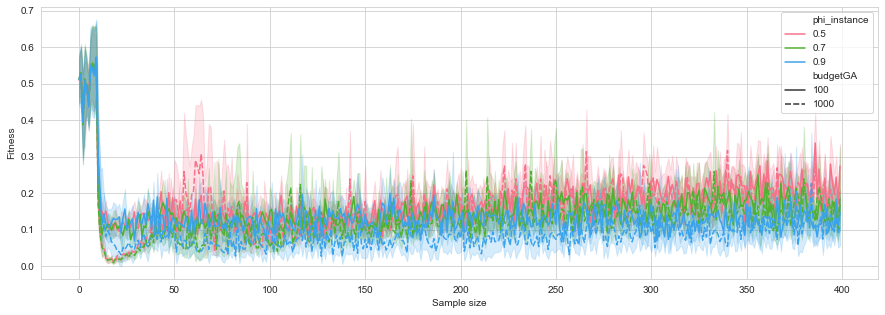

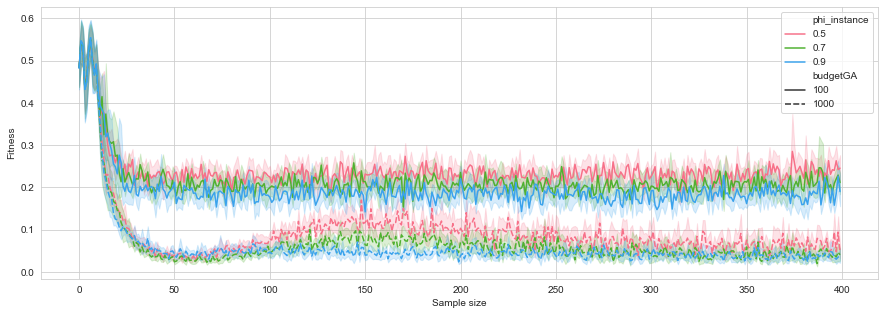

In [87]:
aux = df[df.Solver=='CEGO']
#aux = aux.groupby(['phi_instance','budgetGA','Sample size'])['Fitness'].mean().reset_index()##.plot()
aux##[aux.budgetGA==100]g = sns.lineplot(x='Sample size',y=y_variable,hue='Solver',data=aux, palette=palette)
palette = sns.color_palette("husl", 3)
plt.figure(figsize=(15,5))
sns.lineplot(x='Sample size',y='Fitness', style='budgetGA',hue='phi_instance', data=aux[aux.n==10], palette=palette)#ci=None, 
plt.figure(figsize=(15,5))
sns.lineplot(x='Sample size',y='Fitness', style='budgetGA',hue='phi_instance', data=aux[aux.n==20], palette=palette)#ci=None, 

# References
- http://www.spotseven.de/wp-content/papercite-data/pdf/zaef14c.pdf
- https://dl.acm.org/doi/pdf/10.1145/2576768.2598282  
- https://pubsonline.informs.org/doi/10.1287/ijoc.1120.0506
- https://link.springer.com/article/10.1007/s11721-015-0106-x
- http://iridia.ulb.ac.be/supp/IridiaSupp2015-004/index.html#Scenarios
- instances LOLIB: http://grafo.etsii.urjc.es/optsicom/lolib/#instances
- bayesian opt tutorial: https://arxiv.org/pdf/1012.2599.pdf
- VEGO package: https://cran.r-project.org/web/packages/CEGO/CEGO.pdf
- A Bayesian Discrete Optimization Algorithm for Permutation Based Combinatorial Problems 

  
  falta encontrar donde habia uno con el LOP
  
# LOP instance generator
  The instances $M$ follow this distribution $M_\phi[i,j]$
  $$M_\phi[i,j] = h(j-i+1,\phi) - h(j-i,\phi),$$ where $$h(k,\phi)=k/(1-\phi^k).$$
  
Taking different values of $\phi$ we controll the uniformity of $M$:
  
  

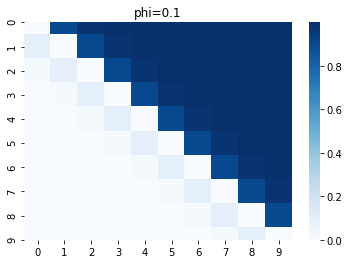

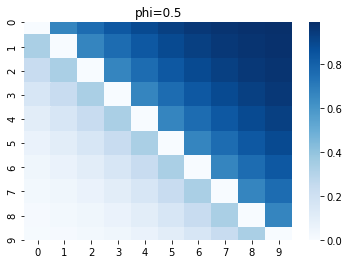

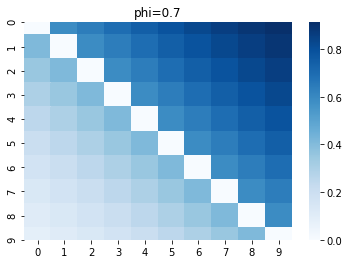

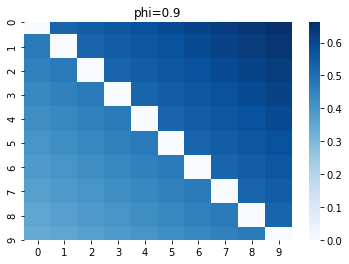

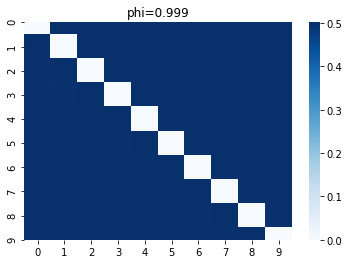

In [3]:
def h(k,phi):
  if (1-phi**k) == 0 : 
    return 0
  return k/(1-phi**k)
  #h(k,\phi)=k/(1-\phi^k)
def mij(i,j,phi):
  return h(j-i+1,phi) - h(j-i,phi)
      #h(j-i+1,\phi) - h(j-i,\phi)
n = 10
for phi in [0.1,0.5,0.7,0.9,0.999]:
  M = np.zeros((n,n))
  for i in range(n):
    for j in range(i+1,n):
      M[i,j] = mij(i,j,phi)
      M[j,i] = 1-M[i,j]
  g = sns.heatmap(M, cmap="Blues")
  g.set_title("phi="+str(phi))
  plt.show()

# Do similar permutations have similar fitness?
In this experiment we analyse the relation between similarity in Kendall distance and in fitness funtion evaluation in the LOP instances. The process is as follows:

do 100 times:

1. a,b = generate two u.a.r. permutations
3. $x = d(a,b)$
2. $y = |f(a) - f(b)|$
4. draw a point in $(x,y)$


We see that:
- close permutations have similar fitness
- distant permutations have high variance in fitness

Kriging assumptions:
- stationarity (yes)
- constant variogram (no)

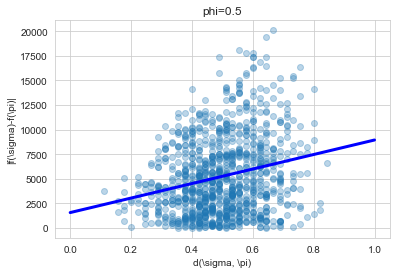

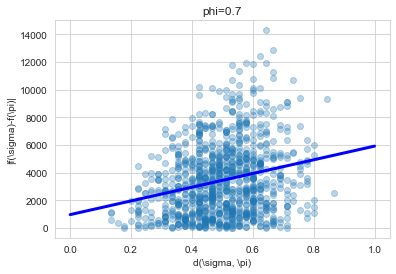

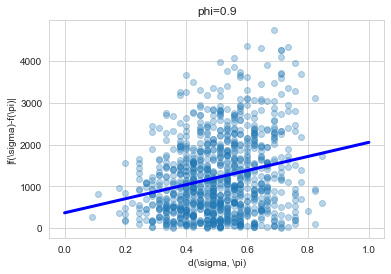

In [14]:
reload(cego_lop)
reload(cego)
reload(lop)

n = 10
for phi in [0.5,0.7,0.9]:
  instance = lop.synthetic_LOP(n,1000,phi)
  xs, ys = [],[]
  for reps in range(1000):
    a,b = np.random.permutation(range(n)),np.random.permutation(range(n))
    ys.append(abs(lop.get_fitness(a, instance) - lop.get_fitness(b, instance)))
    #xs.append(mk.kendallTau(np.argsort(a),np.argsort(b))) #similar
    xs.append(mk.kendallTau(a,b)/(n*(n-1)/2))
  plt.scatter(xs,ys,alpha=0.3)
  regr = linear_model.LinearRegression()
  regr.fit([[x] for x in xs], ys)
  pred = regr.predict([[x] for x in np.linspace(0,1)])
  plt.plot(np.linspace(0,1), pred, color='blue', linewidth=3)

  plt.ylabel(r'|f(\sigma)-f(\pi)|')
  plt.xlabel(r'd(\sigma, \pi)')
  plt.title("phi="+str(phi))
  plt.show()

# TODO
- meter más problemas: **PFSP**, TSP, ...
- comparar con otras alternativas: LS? 
- el símil con la optimización bayesiana no está claro, cómo se traslada aquí la función de utilidad?
- demostración de convergencia rápida 
- escribir draft para tener el modelo claro
- maximize (squarre) sum of distances for ini